In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(11, 4)})
from scipy import stats
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions

In [2]:
nike = pd.read_csv("outbound_hkg_nike.csv")
nike.shape

(1815689, 22)

In [3]:
nike.isnull().sum()

region                     0
dbid                       0
deliverydate               0
storerkey                  0
company                    0
CustomerGroupName          0
MarketSegment              0
CountryOfOrigin      1815689
containertype        1815689
facility                   0
descr                      0
orderkey                   0
sku                        0
descr.1                    0
skugroup                   0
style                      0
class                      0
size                       0
uom                        0
shippedqty                 0
cube                       0
weight                     0
dtype: int64

In [4]:
del nike['region']
del nike['dbid']
del nike['storerkey']
del nike['company']
del nike['CustomerGroupName']
del nike['MarketSegment']
del nike['CountryOfOrigin']
del nike['containertype']
del nike['facility']
del nike['descr']
del nike['orderkey']
del nike['style']
del nike['sku']
del nike['cube']
del nike['weight']
del nike['class']
del nike['size']
del nike['descr.1']
del nike['uom']
nike.head(10)

,deliverydate,skugroup,shippedqty
0,2021-01-02,APPAREL,1
1,2021-01-02,APPAREL,2
2,2021-01-02,APPAREL,2
3,2021-01-02,APPAREL,1
4,2021-01-02,APPAREL,2
5,2021-01-02,APPAREL,2
6,2021-01-02,APPAREL,2
7,2021-01-02,APPAREL,1
8,2021-01-02,APPAREL,1
9,2021-01-02,APPAREL,1


In [5]:
Filter_skugroup=nike["skugroup"].unique()
print('Filter_skugroup:',Filter_skugroup)

Filter_skugroup: ['APPAREL' 'FOOTWEAR' 'EQUIPMENT']


In [6]:
nike_APPAREL =nike.loc[nike['skugroup'] == 'APPAREL']
nike_EQUIPMENT =nike.loc[nike['skugroup'] == 'EQUIPMENT']
nike_FOOTWEAR =nike.loc[nike['skugroup'] == 'FOOTWEAR']
del nike_APPAREL['skugroup']
del nike_EQUIPMENT['skugroup']
del nike_FOOTWEAR['skugroup']

In [7]:
#Apparel
nike_APPAREL['deliverydate']=pd.to_datetime(nike_APPAREL['deliverydate'])
nike_APPAREL_Groupped = nike_APPAREL.groupby(pd.Grouper(key='deliverydate', axis=0, freq='1D', sort=True))
result_nike_APPAREL=nike_APPAREL_Groupped.sum()
Finalresult_nike_APPAREL = result_nike_APPAREL["shippedqty"].to_frame()
Finaldateframe_nike_APPAREL=Finalresult_nike_APPAREL[~(Finalresult_nike_APPAREL==0).any(axis=1)]
Finaldateframe_nike_APPAREL.reset_index()[['deliverydate', 'shippedqty']].to_csv('Appeal_outlier_dataset.csv',index=False)
#Equipemnt
nike_EQUIPMENT['deliverydate']=pd.to_datetime(nike_EQUIPMENT['deliverydate'])
nike_EQUIPMENT_Groupped = nike_EQUIPMENT.groupby(pd.Grouper(key='deliverydate', axis=0, freq='1D', sort=True))
result_nike_EQUIPMENT=nike_EQUIPMENT_Groupped.sum()
Finalresult_nike_EQUIPMENT = result_nike_EQUIPMENT["shippedqty"].to_frame()
Finaldateframe_nike_EQUIPMENT=Finalresult_nike_EQUIPMENT[~(Finalresult_nike_EQUIPMENT==0).any(axis=1)]
Finaldateframe_nike_EQUIPMENT.reset_index()[['deliverydate', 'shippedqty']].to_csv('EQUIPMENT_outlier_dataset.csv',index=False)
#Footwear
nike_FOOTWEAR['deliverydate']=pd.to_datetime(nike_FOOTWEAR['deliverydate'])
nike_FOOTWEAR_Groupped = nike_FOOTWEAR.groupby(pd.Grouper(key='deliverydate', axis=0, freq='1D', sort=True))
result_nike_FOOTWEAR=nike_FOOTWEAR_Groupped.sum()
Finalresult_nike_FOOTWEAR = result_nike_FOOTWEAR["shippedqty"].to_frame()
Finaldateframe_nike_FOOTWEAR=Finalresult_nike_FOOTWEAR[~(Finalresult_nike_FOOTWEAR==0).any(axis=1)]
Finaldateframe_nike_FOOTWEAR.reset_index()[['deliverydate', 'shippedqty']].to_csv('FOOTWEAR_outlier_dataset.csv',index=False)

/var/folders/tk/18btw3h93bq0rk_cn_55mh900000gn/T/ipykernel_60359/1036630415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_APPAREL['deliverydate']=pd.to_datetime(nike_APPAREL['deliverydate'])
/var/folders/tk/18btw3h93bq0rk_cn_55mh900000gn/T/ipykernel_60359/1036630415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_EQUIPMENT['deliverydate']=pd.to_datetime(nike_EQUIPMENT['deliverydate'])
/var/folders/tk/18btw3h93bq0rk_cn_55mh900000gn/T/ipykernel_60359/1036630415.py:16: SettingWithCopyWarnin

In [8]:
#APPAREL
pf_APPAREL = pd.read_csv("Appeal_outlier_dataset.csv")
data_APPAREL=pf_APPAREL['shippedqty']
#Equipemnt
pf_Equipemnt = pd.read_csv("EQUIPMENT_outlier_dataset.csv")
data_Equipemnt=pf_Equipemnt['shippedqty']
#FOOTWEAR
pf_FOOTWEAR = pd.read_csv("FOOTWEAR_outlier_dataset.csv")
data_FOOTWEAR=pf_FOOTWEAR['shippedqty']

In [9]:
def Outiler(data):
    median = statistics.median(data)
    Q3 = (3/4)*median
    Q1 = (1/4)*median
    IQR = Q3-Q1
    lower_outlier = Q1 - 1.5*IQR
    higher_outlier = Q3 + 1.5*IQR
    plt.boxplot(data)
    plt.axhline(y=lower_outlier, color='blue', linestyle='-')
    plt.axhline(y=higher_outlier, color='green', linestyle='-')
    print('Q3:',Q3)
    print('Q1:',Q1)
    print('IQR:',IQR)
    print('lower_outlier:',lower_outlier)
    print('higher_outlier:',higher_outlier)
    return Q1,Q3,IQR,lower_outlier,higher_outlier

Q3: 5180.25
Q1: 1726.75
IQR: 3453.5
lower_outlier: -3453.5
higher_outlier: 10360.5
Q3: 5180.25
Q1: 1726.75
IQR: 3453.5
lower_outlier: -3453.5
higher_outlier: 10360.5


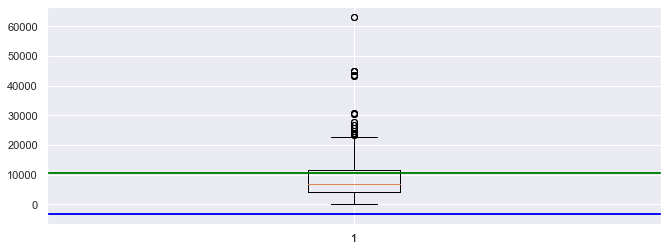

In [14]:
data=data_APPAREL
Outiler(data)
Q1,Q3,IQR,lower_outlier,higher_outlier =Outiler(data)

In [17]:
Q3_Appeal=Q3
IQR_Appeal=IQR
pf_APPAREL.loc[data > (Q3_Appeal + 1.5 * IQR_Appeal) ] = np.nan
pf_APPAREL.to_csv('Appeal_outlier_dataset.csv',index=False)
pf_APPAREL.dropna(axis = 0).to_csv('Appeal_outlier_dataset.csv',index=False)

Q3: 1431.0
Q1: 477.0
IQR: 954.0
lower_outlier: -954.0
higher_outlier: 2862.0
Q3: 1431.0
Q1: 477.0
IQR: 954.0
lower_outlier: -954.0
higher_outlier: 2862.0


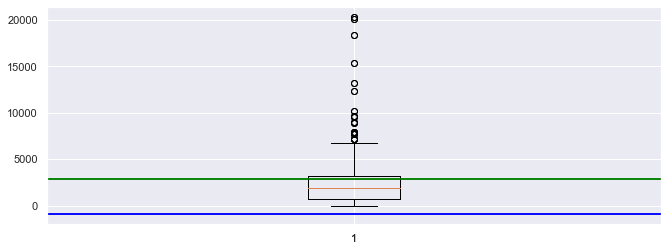

In [18]:
data=data_Equipemnt
Outiler(data)
Q1,Q3,IQR,lower_outlier,higher_outlier =Outiler(data)

In [20]:
Q3_EQUIPMENT=Q3
IQR_EQUIPMENT=IQR
pf_Equipemnt.loc[data > (Q3_EQUIPMENT + 1.5 * IQR_EQUIPMENT) ] = np.nan
pf_Equipemnt.to_csv('EQUIPMENT_outlier_dataset.csv',index=False)
pf_Equipemnt.dropna(axis = 0).to_csv('EQUIPMENT_outlier_dataset.csv',index=False)

Q3: 7510.5
Q1: 2503.5
IQR: 5007.0
lower_outlier: -5007.0
higher_outlier: 15021.0
Q3: 7510.5
Q1: 2503.5
IQR: 5007.0
lower_outlier: -5007.0
higher_outlier: 15021.0


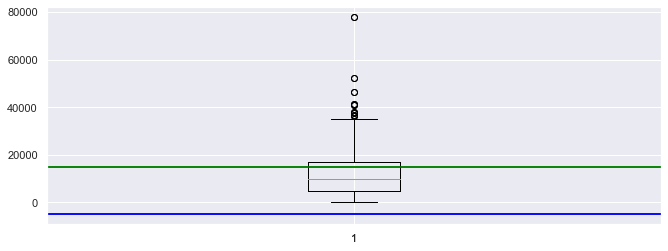

In [21]:
data=data_FOOTWEAR
Outiler(data)
Q1,Q3,IQR,lower_outlier,higher_outlier =Outiler(data)

In [22]:
Q3_FOOTWEAR=7510.5
IQR_FOOTWEAR=5007.0
pf_FOOTWEAR.loc[data > (Q3_FOOTWEAR+ 1.5 * IQR_FOOTWEAR) ] = np.nan
pf_FOOTWEAR.to_csv('FOOTWEAR_outlier_dataset.csv',index=False)
pf_FOOTWEAR.dropna(axis = 0).to_csv('FOOTWEAR_outlier_dataset.csv',index=False)